# ML PROJECT KEL 2

In [37]:
# 1. IMPORT LIBRARY
# data preparation
import pandas as pd
import numpy as np

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# visualisasi data (grafik)
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# 2. IMPORT DATASET
# Import Dataset Populasi Unggas
df_pop = pd.read_csv('populasi_daging_unggas.csv')

In [39]:
# Import dataset Produksi Unggas
df_prod = pd.read_csv('produksi_daging_unggas.csv')

In [40]:
df_pop.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,jenis_unggas,populasi_unggas,satuan,tahun
0,1,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,AYAM KAMPUNG,48045.0,EKOR,2023
1,2,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,AYAM PETELOR,0.0,EKOR,2023
2,3,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,AYAM PEDAGING,327000.0,EKOR,2023
3,4,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,ITIK,101980.0,EKOR,2023
4,5,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213220,BLANAKAN,321313,BLANAKAN,AYAM KAMPUNG,42880.0,EKOR,2023


In [41]:
df_prod.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,jenis_unggas,jumlah_produksi,satuan,tahun
0,1,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,AYAM KAMPUNG,44.475,KG,2023
1,2,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,AYAM PETELUR,262.581,KG,2023
2,3,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,AYAM PEDAGING,0,KG,2023
3,4,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213170,BINONG,321308,BINONG,ITIK/ITIK MANILA,63.874,KG,2023
4,5,32,JAWA BARAT,3213,KABUPATEN SUBANG,3213220,BLANAKAN,321313,BLANAKAN,AYAM KAMPUNG,38.377,KG,2023


In [42]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         240 non-null    int64  
 1   kode_provinsi              240 non-null    int64  
 2   nama_provinsi              240 non-null    object 
 3   kode_kabupaten_kota        240 non-null    int64  
 4   nama_kabupaten_kota        240 non-null    object 
 5   bps_kode_kecamatan         240 non-null    int64  
 6   bps_nama_kecamatan         240 non-null    object 
 7   kemendagri_kode_kecamatan  240 non-null    int64  
 8   kemendagri_nama_kecamatan  240 non-null    object 
 9   jenis_unggas               240 non-null    object 
 10  populasi_unggas            240 non-null    float64
 11  satuan                     240 non-null    object 
 12  tahun                      240 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2

In [43]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         240 non-null    int64 
 1   kode_provinsi              240 non-null    int64 
 2   nama_provinsi              240 non-null    object
 3   kode_kabupaten_kota        240 non-null    int64 
 4   nama_kabupaten_kota        240 non-null    object
 5   bps_kode_kecamatan         240 non-null    int64 
 6   bps_nama_kecamatan         240 non-null    object
 7   kemendagri_kode_kecamatan  240 non-null    int64 
 8   kemendagri_nama_kecamatan  240 non-null    object
 9   jenis_unggas               240 non-null    object
 10  jumlah_produksi            240 non-null    object
 11  satuan                     240 non-null    object
 12  tahun                      240 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 24.5+ KB


In [44]:
# 3. DATA PREPARATION
# Kolom relevan dari data populasi
df_populasi_clean = df_pop[['bps_nama_kecamatan','jenis_unggas','populasi_unggas','tahun']]

# Kolom relevan dari data produksi
df_produksi_clean = df_prod[['bps_nama_kecamatan','jenis_unggas','jumlah_produksi','tahun']]

In [45]:
# Ganti NaN (jika ada data yang kosong atau gagal konversi) dengan 0
df_produksi_clean['jumlah_produksi'].fillna(0, inplace=True)
df_populasi_clean['populasi_unggas'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17660\2059890533.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_produksi_clean['jumlah_produksi'].fillna(0, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17660\2059890533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produksi_clean['jumlah_produksi'].fillna(0, inplace=True)
C:\

In [46]:
# Konversi 'jumlah_produksi' ke numerik (menghapus titik ribuan) 
df_produksi_clean['jumlah_produksi'] = ( df_produksi_clean['jumlah_produksi'].astype(str) .str.replace('.', '', regex=False) ) 
df_produksi_clean['jumlah_produksi'] = pd.to_numeric( df_produksi_clean['jumlah_produksi'], errors='coerce' )

C:\Users\HP\AppData\Local\Temp\ipykernel_17660\2421171545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produksi_clean['jumlah_produksi'] = ( df_produksi_clean['jumlah_produksi'].astype(str) .str.replace('.', '', regex=False) )
C:\Users\HP\AppData\Local\Temp\ipykernel_17660\2421171545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produksi_clean['jumlah_produksi'] = pd.to_numeric( df_produksi_clean['jumlah_produksi'], errors='coerce' )


In [47]:
# Seragamkan nama 'Itik'
df_populasi_clean['jenis_unggas'] = df_populasi_clean['jenis_unggas'].replace({'ITIK': 'ITIK/ITIK MANILA'})

C:\Users\HP\AppData\Local\Temp\ipykernel_17660\4276816117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_populasi_clean['jenis_unggas'] = df_populasi_clean['jenis_unggas'].replace({'ITIK': 'ITIK/ITIK MANILA'})


In [48]:
# Transformasi Data Populasi (PIVOTING)
df_populasi_pivot = df_populasi_clean.pivot_table(
    index=['bps_nama_kecamatan', 'tahun'],
    columns='jenis_unggas',
    values='populasi_unggas',
    fill_value=0
).reset_index()

df_populasi_pivot.columns.name = None 
df_populasi_pivot.rename(columns={
    'AYAM KAMPUNG': 'ayam_kampung',
    'AYAM PETELOR': 'ayam_petelor',
    'AYAM PEDAGING': 'ayam_pedaging',
    'ITIK' : 'itik',
    'ITIK/ITIK MANILA': 'itik' 
}, inplace=True)

In [49]:
# 5. Agregasi Data Produksi (Target Y)
# Lakukan SUM (penjumlahan) pada kolom yang sudah dipastikan numerik
df_produksi_grouped = df_produksi_clean.groupby(
    ['bps_nama_kecamatan', 'tahun']
)['jumlah_produksi'].sum().reset_index()

df_produksi_grouped.rename(columns={'jumlah_produksi': 'total_produksi_daging'}, inplace=True)

In [50]:
# Penggabungan (Merge) Data
df_final = pd.merge(
    df_populasi_pivot,
    df_produksi_grouped,
    on=['bps_nama_kecamatan', 'tahun'],
    how='inner' 
)

In [51]:
# Finalisasi Struktur (Sorting)
# Tentukan urutan kolom yang diinginkan
new_order = [
    'tahun',
    'bps_nama_kecamatan',
    'ayam_kampung',
    'ayam_petelor',
    'ayam_pedaging', 
    'itik', 
    'total_produksi_daging'
]
df_final = df_final[new_order]

# Urutkan data: Tahun (asc), lalu Kecamatan (asc)
df_final_data = df_final.sort_values(by=['tahun', 'bps_nama_kecamatan']).reset_index(drop=True)

In [52]:
df_final_data.head()

,tahun,bps_nama_kecamatan,ayam_kampung,ayam_petelor,ayam_pedaging,itik,total_produksi_daging
0,2023,BINONG,48045.0,0.0,327000.0,101980.0,370930.0
1,2023,BLANAKAN,42880.0,0.0,24000.0,45113.0,85905.0
2,2023,CIASEM,30585.0,15000.0,367000.0,11775.0,338417.0
3,2023,CIATER,24372.0,1543.0,353000.0,3428.0,308993.0
4,2023,CIBOGO,28597.0,4000.0,109800.0,6820.0,121054.0


In [53]:
# Simpan dataset final
df_final_data.to_csv('dataset_final.csv', index=False)

In [54]:
# Fitur (X) — populasi unggas
X = df_final_data[['ayam_kampung','ayam_petelor','ayam_pedaging', 'itik']]

# Target (Y)
y = df_final_data['total_produksi_daging']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()

In [57]:
# Latih model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
# Menampilkan intercept regresi dari model
intercept = model.intercept_
intercept

np.float64(963755.4069333859)

In [59]:
# Menampilkan koefisien regresi dari model
coefficients = model.coef_
coefficients

array([  0.42459755, 118.9449565 ,  11.9979641 ,  -0.72078723])

In [60]:
df_final_data.head()

,tahun,bps_nama_kecamatan,ayam_kampung,ayam_petelor,ayam_pedaging,itik,total_produksi_daging
0,2023,BINONG,48045.0,0.0,327000.0,101980.0,370930.0
1,2023,BLANAKAN,42880.0,0.0,24000.0,45113.0,85905.0
2,2023,CIASEM,30585.0,15000.0,367000.0,11775.0,338417.0
3,2023,CIATER,24372.0,1543.0,353000.0,3428.0,308993.0
4,2023,CIBOGO,28597.0,4000.0,109800.0,6820.0,121054.0


In [61]:
y_pred = model.predict(X_test)

In [62]:
# Menghitung MSE dan R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [63]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-square (R2): {r2}')

Mean Absolute Error (MAE): 16458301.759269595
Mean Squared Error (MSE): 1622578903353666.0
Root Mean Squared Error (RMSE): 40281247.539688565
R-square (R2): 0.18430948655781132


In [64]:
# Pickle
import pickle

with open('regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

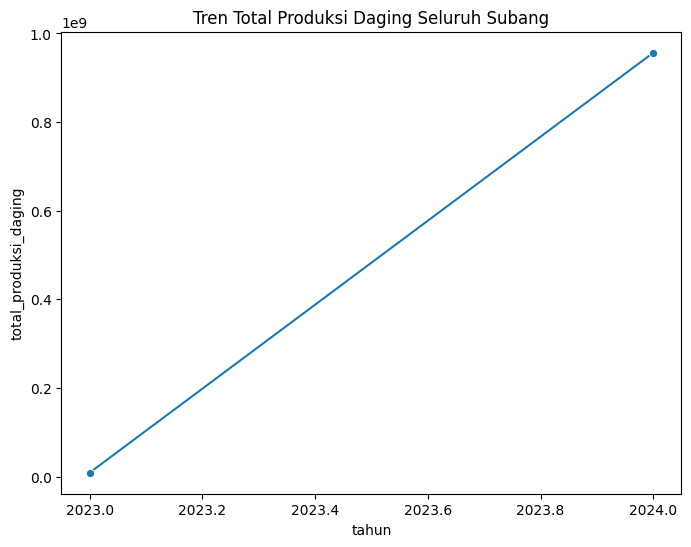

In [65]:
#  EDA
# LINE PLOT 1 (Tren Waktu)
df_trend = df_final_data.groupby('tahun')['total_produksi_daging'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='tahun', y='total_produksi_daging', data=df_trend, marker='o')
plt.title('Tren Total Produksi Daging Seluruh Subang')
plt.show()

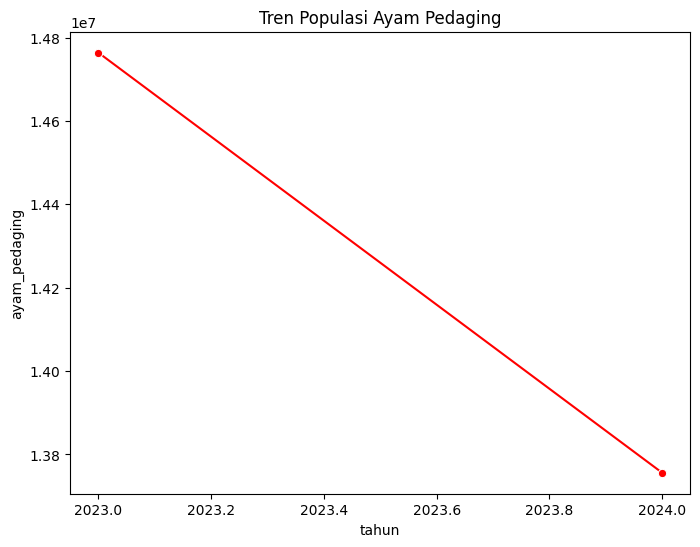

In [66]:
# LINE PLOT 2
df_pop_trend = df_final_data.groupby('tahun')['ayam_pedaging'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='tahun', y='ayam_pedaging', data=df_pop_trend, marker='o', color='red')
plt.title('Tren Populasi Ayam Pedaging')
plt.show()

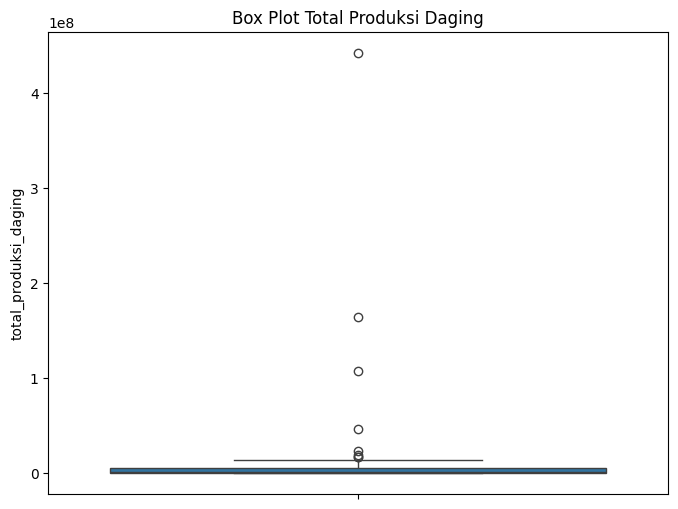

In [67]:
# Distribusi
# BOX PLOT 1
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_final_data['total_produksi_daging'])
plt.title('Box Plot Total Produksi Daging')
plt.show()

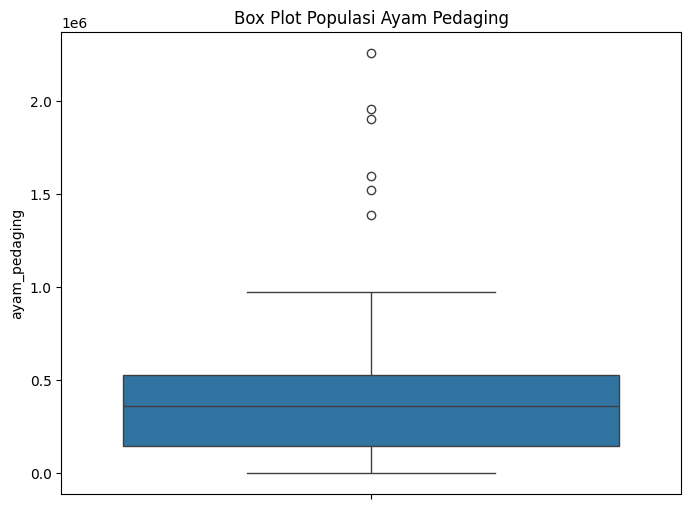

In [68]:
# BOX PLOT 2
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_final_data['ayam_pedaging'])
plt.title('Box Plot Populasi Ayam Pedaging')
plt.show()

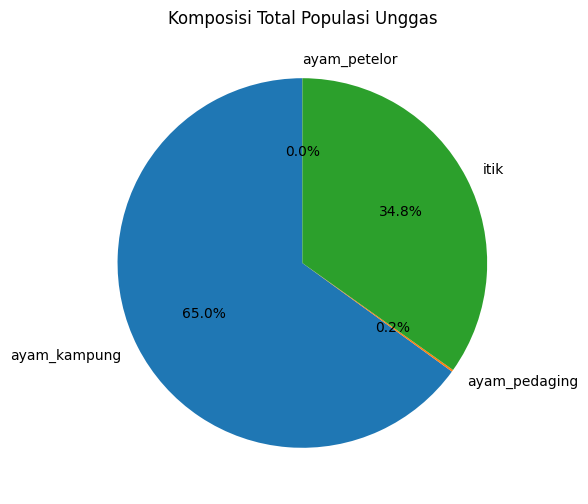

In [69]:
# Komposisi
# 5. PIE CHART 1
# Proporsi Populasi Unggas
pop_sum = df_final_data[['ayam_kampung', 'ayam_pedaging', 'itik', 'ayam_petelor']].sum()
plt.figure(figsize=(8, 6))
plt.pie(pop_sum, labels=pop_sum.index, autopct='%1.1f%%', startangle=90)
plt.title('Komposisi Total Populasi Unggas')
plt.show()

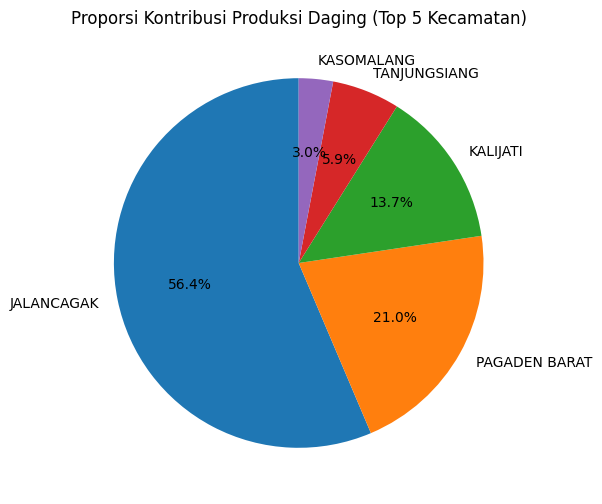

In [70]:
# PIE CHART 2
# Proporsi Kontribusi Produksi Tertinggi (Top 5 Kecamatan)
df_top_kec = df_final_data.nlargest(5, 'total_produksi_daging')
pie_data_kec = pd.Series(df_top_kec['total_produksi_daging'].tolist(), 
                         index=df_top_kec['bps_nama_kecamatan'].tolist())

plt.figure(figsize=(6, 6))
plt.pie(pie_data_kec, labels=pie_data_kec.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kontribusi Produksi Daging (Top 5 Kecamatan)')
plt.show()

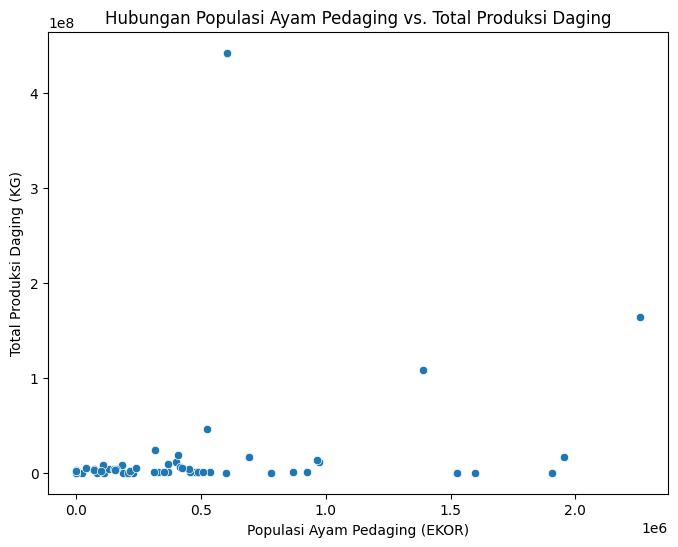

In [71]:
# SCATTER PLOT (Hubungan Fitur Terkuat dengan Target)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ayam_pedaging', y='total_produksi_daging', data=df_final_data)
plt.title('Hubungan Populasi Ayam Pedaging vs. Total Produksi Daging')
plt.xlabel('Populasi Ayam Pedaging (EKOR)')
plt.ylabel('Total Produksi Daging (KG)')
plt.show()

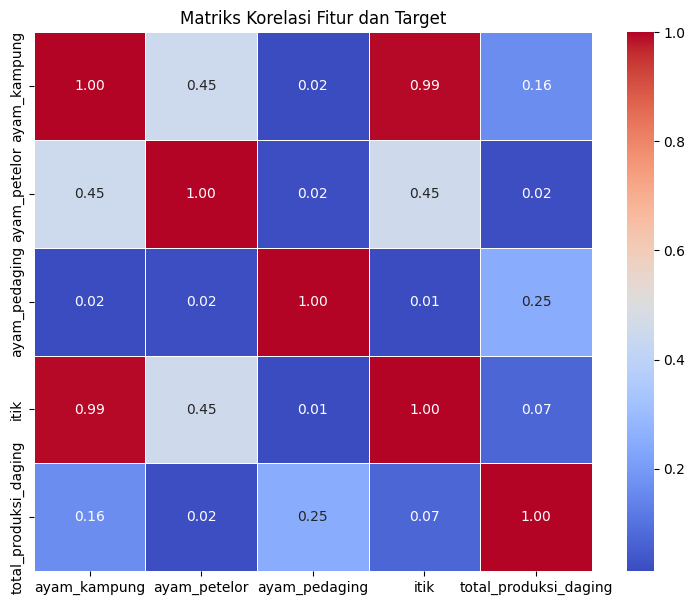

In [72]:
# CORRELATION MATRIX (Heatmap)
plt.figure(figsize=(9, 7))
df_corr = df_final_data.drop(columns=['bps_nama_kecamatan', 'tahun']) 
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Fitur dan Target')
plt.show()